In [87]:
import pandas as pd

In [94]:

import datetime
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('jhmn.csv')

# Do something with the data
print(df.head())


   S.no vegetableName  price  imageProperties_vegetableHeight  \
0     1     Onion Big     40                               64   
1     2   Onion Small     63                               60   
2     3        Tomato     19                               50   
3     4  Green Chilli     43                               69   
4     5      Beetroot     49                               93   

   imageProperties_vegetableWidth  imageProperties_vegetableTop units  \
0                              64                             0   1kg   
1                              64                            64   1kg   
2                              64                           124   1kg   
3                              64                           174   1kg   
4                              64                           243   1kg   

           id shopingMallPrice retailPrice  \
0    onionBig          48 - 66     46 - 51   
1  onionSmall         76 - 104     72 - 80   
2      tomato          23 - 31  

In [89]:
df.columns

Index(['S.no', 'vegetableName', 'price', 'imageProperties_vegetableHeight',
       'imageProperties_vegetableWidth', 'imageProperties_vegetableTop',
       'units', 'id', 'shopingMallPrice', 'retailPrice', 'table_imageUrl',
       'table_imageSize', 'table_heightRatio', 'date'],
      dtype='object')

In [90]:

# Convert the Month-Year column to a pandas datetime object and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('S.no', inplace=True)

# Filter the DataFrame to only include dates between 15th November 2021 and 31 March 2023
df_filtered = df.loc[(df['date'] >= '2022-01-26') & (df['date'] <= '2023-03-31')]

# Group the DataFrame by vegetable name and month-year and calculate the mean price for each group
df_grouped = df_filtered.groupby(['vegetableName', pd.Grouper(key='date', freq='M')])['price'].mean().reset_index()

# Rename the Month-Year column to 'month' and sort the resulting DataFrame by vegetable name and month
df_grouped.rename(columns={'date': 'month'}, inplace=True)
df_grouped.sort_values(['vegetableName', 'month'], inplace=True)

# Display the resulting DataFrame
print(df_grouped)



       vegetableName      month      price
0    Amaranth Leaves 2022-01-31  14.666667
1    Amaranth Leaves 2022-02-28  14.535714
2    Amaranth Leaves 2022-03-31  15.774194
3    Amaranth Leaves 2022-04-30  15.233333
4    Amaranth Leaves 2022-05-31  15.129032
..               ...        ...        ...
805           Tomato 2022-11-30  22.500000
806           Tomato 2022-12-31  18.258065
807           Tomato 2023-01-31  22.967742
808           Tomato 2023-02-28  23.928571
809           Tomato 2023-03-31  26.129032

[810 rows x 3 columns]


In [91]:
df.columns

Index(['vegetableName', 'price', 'imageProperties_vegetableHeight',
       'imageProperties_vegetableWidth', 'imageProperties_vegetableTop',
       'units', 'id', 'shopingMallPrice', 'retailPrice', 'table_imageUrl',
       'table_imageSize', 'table_heightRatio', 'date'],
      dtype='object')

In [92]:
df.head()

,vegetableName,price,imageProperties_vegetableHeight,imageProperties_vegetableWidth,imageProperties_vegetableTop,units,id,shopingMallPrice,retailPrice,table_imageUrl,table_imageSize,table_heightRatio,date
S.no,,,,,,,,,,,,,
1,Onion Big,40,64,64,0,1kg,onionBig,48 - 66,46 - 51,resource/images/vegetables/onionBig-64.png,1.0,1.00,2022-01-26
2,Onion Small,63,60,64,64,1kg,onionSmall,76 - 104,72 - 80,resource/images/vegetables/onionSmall-64.png,1.0,0.94,2022-01-26
3,Tomato,19,50,64,124,1kg,tomato,23 - 31,22 - 24,resource/images/vegetables/tomato-64.png,1.2,0.77,2022-01-26
4,Green Chilli,43,69,64,174,1kg,greenChili,52 - 71,49 - 55,resource/images/vegetables/greenChili-64.png,1.0,1.08,2022-01-26
5,Beetroot,49,93,64,243,1kg,beetroot,59 - 81,56 - 62,resource/images/vegetables/beetroot-64.png,0.8,1.43,2022-01-26


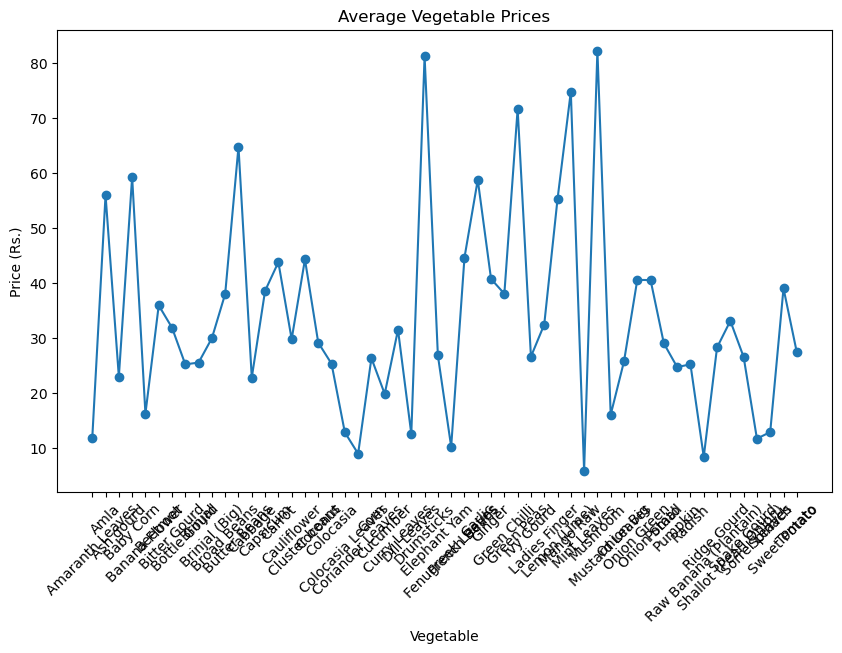

In [97]:
avg_prices = df.groupby('vegetableName')['price'].mean()
# Create a line chart for the average price of each vegetable
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(avg_prices.index, avg_prices.values, marker='o')

# Set the chart title and axis labels
ax.set_title('Average Vegetable Prices')
ax.set_xlabel('Vegetable')
ax.set_ylabel('Price (Rs.)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()
